In [1]:
#Importing dependencies
import json
import tweepy
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gathering Data =================================================

### Image Predictions

In [2]:
# Gather tsv file from target website using requests library
target_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
server_response = requests.get(target_url)

# #Create 'image_predictions.tsv' file from server response
with open('image_predictions.tsv', mode = 'wb') as f:
    f.write(server_response.content)
    
# Import tsv file as dataframe
img_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### Twitter Archive

In [3]:
# Read provided csv file to a pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Twitter API 

In [4]:
# #Twitter API access.
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
# # Query Twitter api and store each tweet on a new line in file tweet_json.txt
with open('tweet_json.txt', mode = 'a', encoding='utf-8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [6]:
# Translate tweets from json text file to list.
tweets_list = []

with open('tweet_json.txt', mode = 'r') as f:
    for line in f:
        try:
            tweet = json.loads(line)
            tweets_list.append(tweet)
        except:
            continue        

In [7]:
# Initialize new dataframe for tweets from api
api_tweets = pd.DataFrame()

# Populate api_tweets dataframe

api_tweets['tweet_id'] = [tweet['id'] for tweet in tweets_list]
api_tweets['retweet_count'] = [tweet['retweet_count'] for tweet in tweets_list]
api_tweets['favorite_count'] = [tweet['favorite_count'] for tweet in  tweets_list]


# Assessing Data ================================================

### Image Predictions Assessment

In [8]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
img_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1710,818259473185828864,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,1,miniature_schnauzer,0.367368,True,toy_poodle,0.112479,True,standard_schnauzer,0.095434,True
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False
1308,753655901052166144,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,0.144147,True
888,699079609774645248,https://pbs.twimg.com/media/CbOhMUDXIAACIWR.jpg,3,schipperke,0.667324,True,Chesapeake_Bay_retriever,0.119550,True,kelpie,0.097600,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True


In [12]:
img_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### Twitter API

In [13]:
api_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [14]:
api_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,3042.165032,8097.280171
std,6.833642e+16,5057.728374,12179.405410
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,609.000000,1408.000000
50%,7.189392e+17,1423.000000,3549.000000
75%,7.986979e+17,3546.000000,10013.000000
max,8.924206e+17,77714.000000,143943.000000


In [15]:
api_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8639,38965
1,892177421306343426,6348,33354
2,891815181378084864,4213,25140
3,891689557279858688,8758,42298
4,891327558926688256,9521,40469


In [16]:
api_tweets.sample(5)

,tweet_id,retweet_count,favorite_count
1882,674752233200820224,503,1549
967,749996283729883136,892,3273
132,866334964761202691,15082,53746
2270,667369227918143488,170,379
1860,675147105808306176,261,998


In [17]:
api_tweets.tail()

,tweet_id,retweet_count,favorite_count
2340,666049248165822465,40,109
2341,666044226329800704,141,301
2342,666033412701032449,45,125
2343,666029285002620928,47,131
2344,666020888022790149,520,2558


### Twitter Archive

In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Other pupper asked not to have his identity sh...,NaN,NaN,NaN,NaN,12,10,None,None,None,pupper,None
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None
1695,681261549936340994,NaN,NaN,2015-12-27 23:53:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Panda. He's a Quackadilly Shooste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681261549...,9,10,Panda,None,None,None,None
2176,669203728096960512,NaN,NaN,2015-11-24 17:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samsom. He is sexually confused. Reall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669203728...,9,10,Samsom,None,None,None,None


In [22]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [23]:
# List all entries where names are None
twitter_archive[twitter_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [24]:
# Look at entries where name is lowercase
twitter_archive[twitter_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [25]:
# Look at entries where text does not contain a link
twitter_archive[~twitter_archive.text.str.contains('https://')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
171,858860390427611136,NaN,NaN,2017-05-01 01:47:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Winston. He knows he's a l...,8.395493e+17,4.196984e+09,2017-03-08 18:52:12 +0000,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None


In [26]:
# Look at entries where text contains a '@'
twitter_archive[twitter_archive.text.str.contains('@')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None


In [27]:
# Looking at raw counts of tweets from all three sources
print("Image prediction id count: ", img_predictions.tweet_id.count())
print("Twitter archive id count: ", twitter_archive.tweet_id.count())
print("API id count: ", api_tweets.tweet_id.count())

Image prediction id count:  2075
Twitter archive id count:  2356
API id count:  2345


In [28]:
# Look at counts for each source type
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
# Count for rows with missing 'expanded_urls' links 
twitter_archive[twitter_archive['expanded_urls'].isnull()].count()

tweet_id                      59
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     59
source                        59
text                          59
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                  0
rating_numerator              59
rating_denominator            59
name                          59
doggo                         59
floofer                       59
pupper                        59
puppo                         59
dtype: int64

In [30]:
# Show names that contain non-ascii characters
for i in twitter_archive['name']:
    if all(ord(char) < 128 for char in i) == False:
        print(i)


Devón
Ralphé
Flávio
Oliviér
Frönq
Flávio
Oliviér
Amélie
Gòrdón


In [31]:
#Look at numerator rating distribution
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [32]:
# Look at count of retweets
twitter_archive.retweeted_status_id.count()

181

In [33]:
# Look at count of replies
twitter_archive.in_reply_to_user_id.count()

78

In [34]:
# Check to see if all denominators are equal to 10
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [35]:
# Show count of entries in img_predictions where predictions are not all dog breeds.
(img_predictions.count()) - (img_predictions[img_predictions['p1_dog'] == True
& (img_predictions['p2_dog'] == True)
& (img_predictions['p3_dog'] == True)].count())

tweet_id    390
jpg_url     390
img_num     390
p1          390
p1_conf     390
p1_dog      390
p2          390
p2_conf     390
p2_dog      390
p3          390
p3_conf     390
p3_dog      390
dtype: int64

Quality:
    - Timestamps are string data type should be datetime
    - One extremely high 'rating_numerator' value
    - Source data can be classified in categories
    - Data contains retweets / retweet id columns    
    - Variablitiy in denominator values
    - Some names contain non-ascii characters
    - Name entries that are single characters / random words
    - Name entries as none
    - Entries with missing expanded urls 
    - Image_predictions file contains entries that the algorithm believes are not dogs
Tidiness:
    - Ratings can be consolidated to one column (removed)
    - 4 columns for each dog stage can be tidied to one column "dog_stage"
    - Consolidate all 3 files / dataframes into one file by joining on tweet ID



# Clean ========================================================

In [36]:
# First and foremost we make temporary dataframe copies to work on.
temp_img_predictions = img_predictions.copy()
temp_twitter_archive = twitter_archive.copy()
temp_api_tweets = api_tweets.copy()

## Quality Issues  ----------------------------------------------------------------------------------------------------------

### Define

Convert timestamps from string to datetime objects.

### Code

In [37]:
temp_twitter_archive['timestamp'] =  pd.to_datetime(temp_twitter_archive.timestamp)

### Test

In [38]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Define

Remove one extremely high numerator value of 1776

### Code

In [39]:
temp_twitter_archive = temp_twitter_archive[temp_twitter_archive['rating_numerator'] != 1776]

### Test

In [40]:
temp_twitter_archive.rating_numerator.max()

960

### Define

Convert source data from object to category

### Code

In [41]:
temp_twitter_archive['source'] = temp_twitter_archive.source.astype('category')

### Test

In [42]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2355 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2355 non-null datetime64[ns]
source                        2355 non-null category
text                          2355 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2296 non-null object
rating_numerator              2355 non-null int64
rating_denominator            2355 non-null int64
name                          2355 non-null object
doggo                         2355 non-null object
floofer                       2355 non-null object
pupper                        2355 non-null object
puppo                         2355 non-null object
dtypes: category(1), d

In [43]:
temp_twitter_archive.get_dtype_counts()

category          1
datetime64[ns]    1
float64           4
int64             3
object            8
dtype: int64

### Define

Remove retweets

### Code

In [44]:
temp_twitter_archive = temp_twitter_archive[temp_twitter_archive['retweeted_status_id'].isnull()]

### Test

In [45]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2174 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2174 non-null datetime64[ns]
source                        2174 non-null category
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2174 non-null int64
rating_denominator            2174 non-null int64
name                          2174 non-null object
doggo                         2174 non-null object
floofer                       2174 non-null object
pupper                        2174 non-null object
puppo                         2174 non-null object
dtypes: category(1), datetim

### Define 

Remove retweet tracker columns

### Code

In [46]:
# Create list with unecessary columns
rt_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

# Drop columns in rt_cols list
temp_twitter_archive = temp_twitter_archive.drop(rt_cols, axis=1)

### Test

In [47]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null category
text                     2174 non-null object
expanded_urls            2116 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     2174 non-null object
doggo                    2174 non-null object
floofer                  2174 non-null object
pupper                   2174 non-null object
puppo                    2174 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 240.1+ KB


### Define

Remove all denominators not equal to 10

### Code 

In [48]:
# Populate 'rating_denominator' column only with entries where denominator equals to 10
temp_twitter_archive = temp_twitter_archive[temp_twitter_archive['rating_denominator'] == 10]

### Test

In [49]:
temp_twitter_archive[temp_twitter_archive['rating_denominator'] != 10].count()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
doggo                    0
floofer                  0
pupper                   0
puppo                    0
dtype: int64

### Define

Remove names that contain non-ascii characters

### Code 

In [50]:
# Create list of name entries that contain non-ascii characters
non_ascii_names = []
for name in temp_twitter_archive['name']:
    if all(ord(char) < 128 for char in name) == False:
        non_ascii_names.append(name)

# Remove rows with non-ascii character names
temp_twitter_archive = temp_twitter_archive[~temp_twitter_archive.name.isin(non_ascii_names)]

### Test

In [51]:
# If found print non-ascii names
for name in temp_twitter_archive['name']:
    if all(ord(char) < 128 for char in name) == False:
        print(name)

In [52]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2143 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2143 non-null datetime64[ns]
source                   2143 non-null category
text                     2143 non-null object
expanded_urls            2089 non-null object
rating_numerator         2143 non-null int64
rating_denominator       2143 non-null int64
name                     2143 non-null object
doggo                    2143 non-null object
floofer                  2143 non-null object
pupper                   2143 non-null object
puppo                    2143 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 236.7+ KB


### Define

Remove name entries that are lowercase, random words or single letters.

### Code

In [53]:
# Create list with non-names.
non_name = []
for name in temp_twitter_archive['name']:
    if name.islower():
        non_name.append(name)
        
# Remove rows with non-name entries.        
temp_twitter_archive = temp_twitter_archive[~temp_twitter_archive.name.isin(non_name)]

### Test

In [54]:
# Check if there is any lowercase, random words or single letter entries left.
for name in temp_twitter_archive['name']:
    if name.islower():
        print(name)

In [55]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2042 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2042 non-null datetime64[ns]
source                   2042 non-null category
text                     2042 non-null object
expanded_urls            1988 non-null object
rating_numerator         2042 non-null int64
rating_denominator       2042 non-null int64
name                     2042 non-null object
doggo                    2042 non-null object
floofer                  2042 non-null object
pupper                   2042 non-null object
puppo                    2042 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 225.5+ KB


### Define

Remove 'None' name entries

### Code

In [56]:
# Create list with 'None' entries.
none_entries = []
for name in temp_twitter_archive['name']:
    if name == 'None':
        none_entries.append(name)
        
# Remove rows with non-name entries.        
temp_twitter_archive = temp_twitter_archive[~temp_twitter_archive.name.isin(none_entries)]

### Test

In [57]:
# Print 'None' name entries if they are present.
for name in temp_twitter_archive['name']:
    if name == 'None':
        print(name)

In [58]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id                 1378 non-null int64
in_reply_to_status_id    1 non-null float64
in_reply_to_user_id      1 non-null float64
timestamp                1378 non-null datetime64[ns]
source                   1378 non-null category
text                     1378 non-null object
expanded_urls            1378 non-null object
rating_numerator         1378 non-null int64
rating_denominator       1378 non-null int64
name                     1378 non-null object
doggo                    1378 non-null object
floofer                  1378 non-null object
pupper                   1378 non-null object
puppo                    1378 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 152.3+ KB


### Define

Remove entries without expanded urls

### Code

In [59]:
temp_twitter_archive = temp_twitter_archive[~temp_twitter_archive['expanded_urls'].isnull()]

### Test

In [60]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id                 1378 non-null int64
in_reply_to_status_id    1 non-null float64
in_reply_to_user_id      1 non-null float64
timestamp                1378 non-null datetime64[ns]
source                   1378 non-null category
text                     1378 non-null object
expanded_urls            1378 non-null object
rating_numerator         1378 non-null int64
rating_denominator       1378 non-null int64
name                     1378 non-null object
doggo                    1378 non-null object
floofer                  1378 non-null object
pupper                   1378 non-null object
puppo                    1378 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 152.3+ KB


In [61]:
temp_twitter_archive[temp_twitter_archive['expanded_urls'].isnull()].count()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
doggo                    0
floofer                  0
pupper                   0
puppo                    0
dtype: int64

### Define

Remove entries where the neural network's prediction is not a dog for either 3 predictions.

### Code

In [62]:
temp_img_predictions = temp_img_predictions[temp_img_predictions['p1_dog'] == True
& (temp_img_predictions['p2_dog'] == True)
& (temp_img_predictions['p3_dog'] == True)]

### Test

In [63]:
temp_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1685 non-null int64
jpg_url     1685 non-null object
img_num     1685 non-null int64
p1          1685 non-null object
p1_conf     1685 non-null float64
p1_dog      1685 non-null bool
p2          1685 non-null object
p2_conf     1685 non-null float64
p2_dog      1685 non-null bool
p3          1685 non-null object
p3_conf     1685 non-null float64
p3_dog      1685 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 136.6+ KB


In [64]:
temp_img_predictions[~temp_img_predictions['p1_dog'] == True
& (temp_img_predictions['p2_dog'] == True)
& (temp_img_predictions['p3_dog'] == True)].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Tidiness Issues ---------------------------------------------------------------------------------------------------------

### Define

Consolidate 'puppo', 'pupper', 'floofer', 'doggo' columns into one 'dog_stage' column.

### Code

In [65]:
# Create column 'dog_stage' and populate by pattern matching key words and extracting from 'text' column
temp_twitter_archive['dog_stage'] = temp_twitter_archive.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [66]:
#Create variable with column names to be removed
stage_cols = ['doggo','floofer','pupper','puppo']

#Drop columns with header names listed in 'stage_cols' list
temp_twitter_archive = temp_twitter_archive.drop(stage_cols, axis = 1)

### Test

In [67]:
temp_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 2325
Data columns (total 11 columns):
tweet_id                 1378 non-null int64
in_reply_to_status_id    1 non-null float64
in_reply_to_user_id      1 non-null float64
timestamp                1378 non-null datetime64[ns]
source                   1378 non-null category
text                     1378 non-null object
expanded_urls            1378 non-null object
rating_numerator         1378 non-null int64
rating_denominator       1378 non-null int64
name                     1378 non-null object
dog_stage                188 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 120.0+ KB


In [68]:
temp_twitter_archive.dog_stage.sample(5)

1103    doggo
712       NaN
1503      NaN
2129      NaN
2262      NaN
Name: dog_stage, dtype: object

### Define

Unify all three dataframes into one master dataframe by joining on tweet_id.

### Code

In [69]:
# Create temporary master dataframe where temp_twitter_archive and temp_image_predictions are joined on 'tweet_id'
temp_master = pd.merge(left = temp_twitter_archive, right = temp_img_predictions, on = 'tweet_id', how = 'inner')

# Create twitter_archive_master where temp_master is joined with temp_api_tweets
twitter_archive_master = pd.merge(left = temp_master, right = temp_api_tweets, on = 'tweet_id', how = 'inner')

### Test

In [70]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 24 columns):
tweet_id                 1080 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                1080 non-null datetime64[ns]
source                   1080 non-null category
text                     1080 non-null object
expanded_urls            1080 non-null object
rating_numerator         1080 non-null int64
rating_denominator       1080 non-null int64
name                     1080 non-null object
dog_stage                153 non-null object
jpg_url                  1080 non-null object
img_num                  1080 non-null int64
p1                       1080 non-null object
p1_conf                  1080 non-null float64
p1_dog                   1080 non-null bool
p2                       1080 non-null object
p2_conf                  1080 non-null float64
p2_dog                   1080 non-null bool
p3                  

In [71]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8639,38965
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6348,33354
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4213,25140
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8758,42298
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9521,40469


In [72]:
twitter_archive_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
547,724004602748780546,NaN,NaN,2016-04-23 22:38:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Luther. He saw a ghost. Spooked af. 11...,https://twitter.com/dog_rates/status/724004602...,11,10,Luther,...,0.950526,False,pug,0.018877,True,quilt,0.007628,False,1736,4478
367,777885040357281792,NaN,NaN,2016-09-19 15:00:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,...,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True,1851,6954
704,691444869282295808,NaN,NaN,2016-01-25 02:17:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She likes flowers. 12/10 https...,https://twitter.com/dog_rates/status/691444869...,12,10,Bailey,...,0.767563,True,Border_collie,0.085805,True,EntleBucher,0.043769,True,937,2852
276,802572683846291456,NaN,NaN,2016-11-26 18:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's h*ckin ferocious. Dandel...,https://twitter.com/dog_rates/status/802572683...,12,10,Winnie,...,0.610171,True,Labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True,2847,9802
101,852912242202992640,NaN,NaN,2017-04-14 15:51:39,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,"https://www.gofundme.com/bennys-medical-bills,...",12,10,Benny,...,0.783765,True,Rhodesian_ridgeback,0.114147,True,English_foxhound,0.046440,True,1986,9483


In [73]:
twitter_archive_master.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1075,666691418707132416,NaN,NaN,2015-11-17 18:56:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,...,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True,48,189
1076,666644823164719104,NaN,NaN,2015-11-17 15:51:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,...,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True,85,235
1077,666454714377183233,NaN,NaN,2015-11-17 03:16:00,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,...,0.278954,True,Labrador_retriever,0.237612,True,Great_Pyrenees,0.171106,True,215,527
1078,666447344410484738,NaN,NaN,2015-11-17 02:46:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,...,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True,22,104
1079,666418789513326592,NaN,NaN,2015-11-17 00:53:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,...,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True,47,126


## Store Data -----------------------------------------------------------------------------------------------------------------

In [74]:
# Store twitter_archive_master to a csv file.
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Analysis ======================================================

In [75]:
# Create copy of twitter_archive_master
temp_master = twitter_archive_master.copy()

In [76]:
# Setting timestamp as index to allow for time analysis.
temp_master.set_index('timestamp', inplace = True)

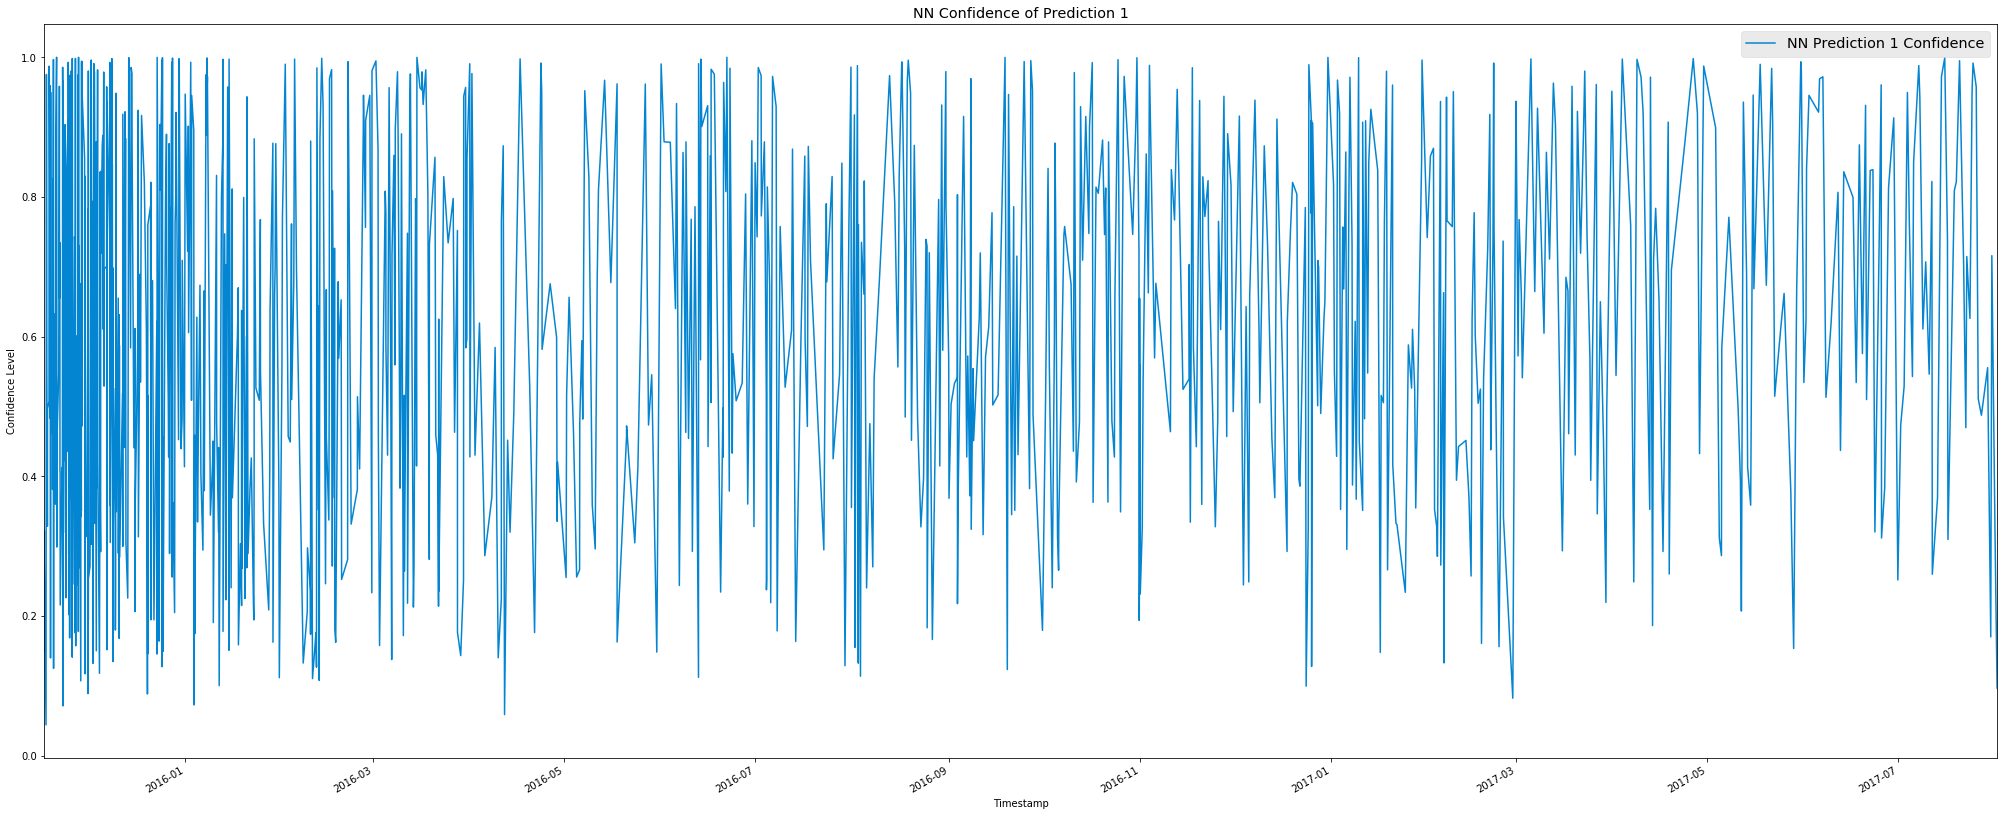

In [77]:
temp_master.p1_conf.plot(label = 'NN Prediction 1 Confidence', color = 'xkcd:cerulean')

plt.style.use('ggplot')
plt.legend(loc = 1,  fontsize = 'x-large')
plt.xlabel('Timestamp')
plt.ylabel('Confidence Level')
plt.title('NN Confidence of Prediction 1')


fig = plt.gcf()
fig.set_size_inches(35, 15)
plt.show()

In [78]:
temp_master.p1_conf.describe()

count    1080.000000
mean        0.608601
std         0.269731
min         0.044333
25%         0.379287
50%         0.610877
75%         0.862160
max         1.000000
Name: p1_conf, dtype: float64

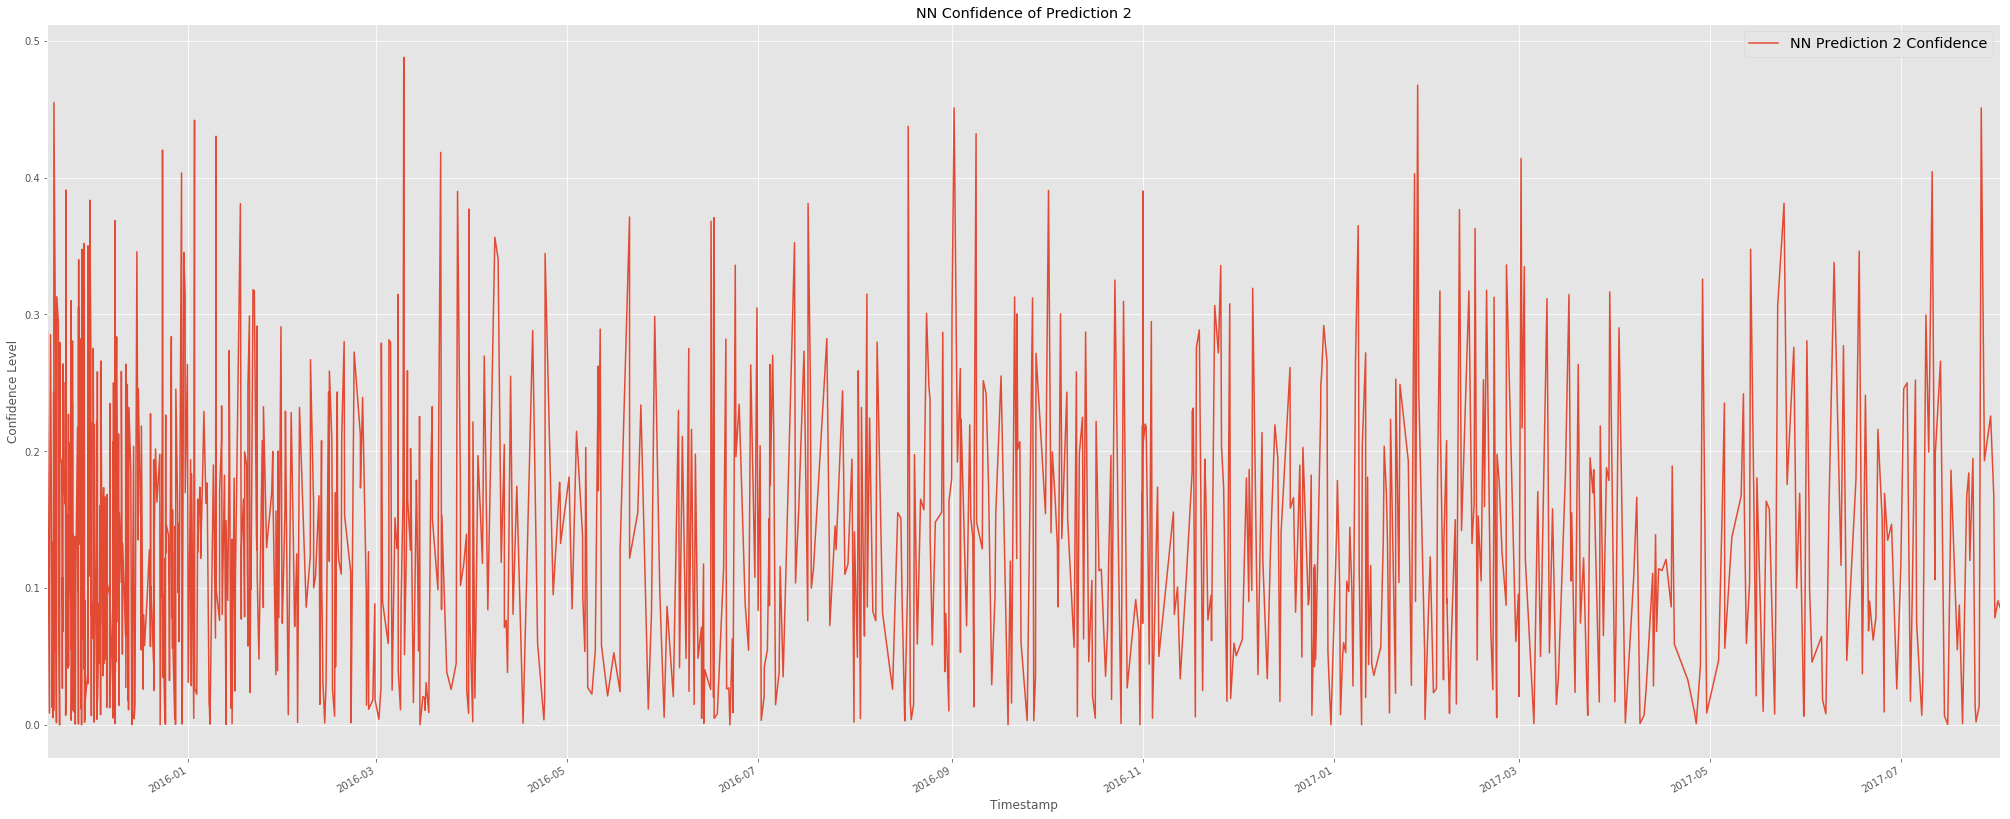

In [79]:
temp_master.p2_conf.plot(label = 'NN Prediction 2 Confidence')


plt.style.use('ggplot')
plt.legend(loc = 1,  fontsize = 'x-large')
plt.xlabel('Timestamp')
plt.ylabel('Confidence Level')
plt.title('NN Confidence of Prediction 2')


fig = plt.gcf()
fig.set_size_inches(35, 15)
plt.show()

In [80]:
temp_master.p2_conf.describe()

count    1.080000e+03
mean     1.357683e-01
std      1.015043e-01
min      1.011300e-08
25%      5.240250e-02
50%      1.216395e-01
75%      1.979010e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

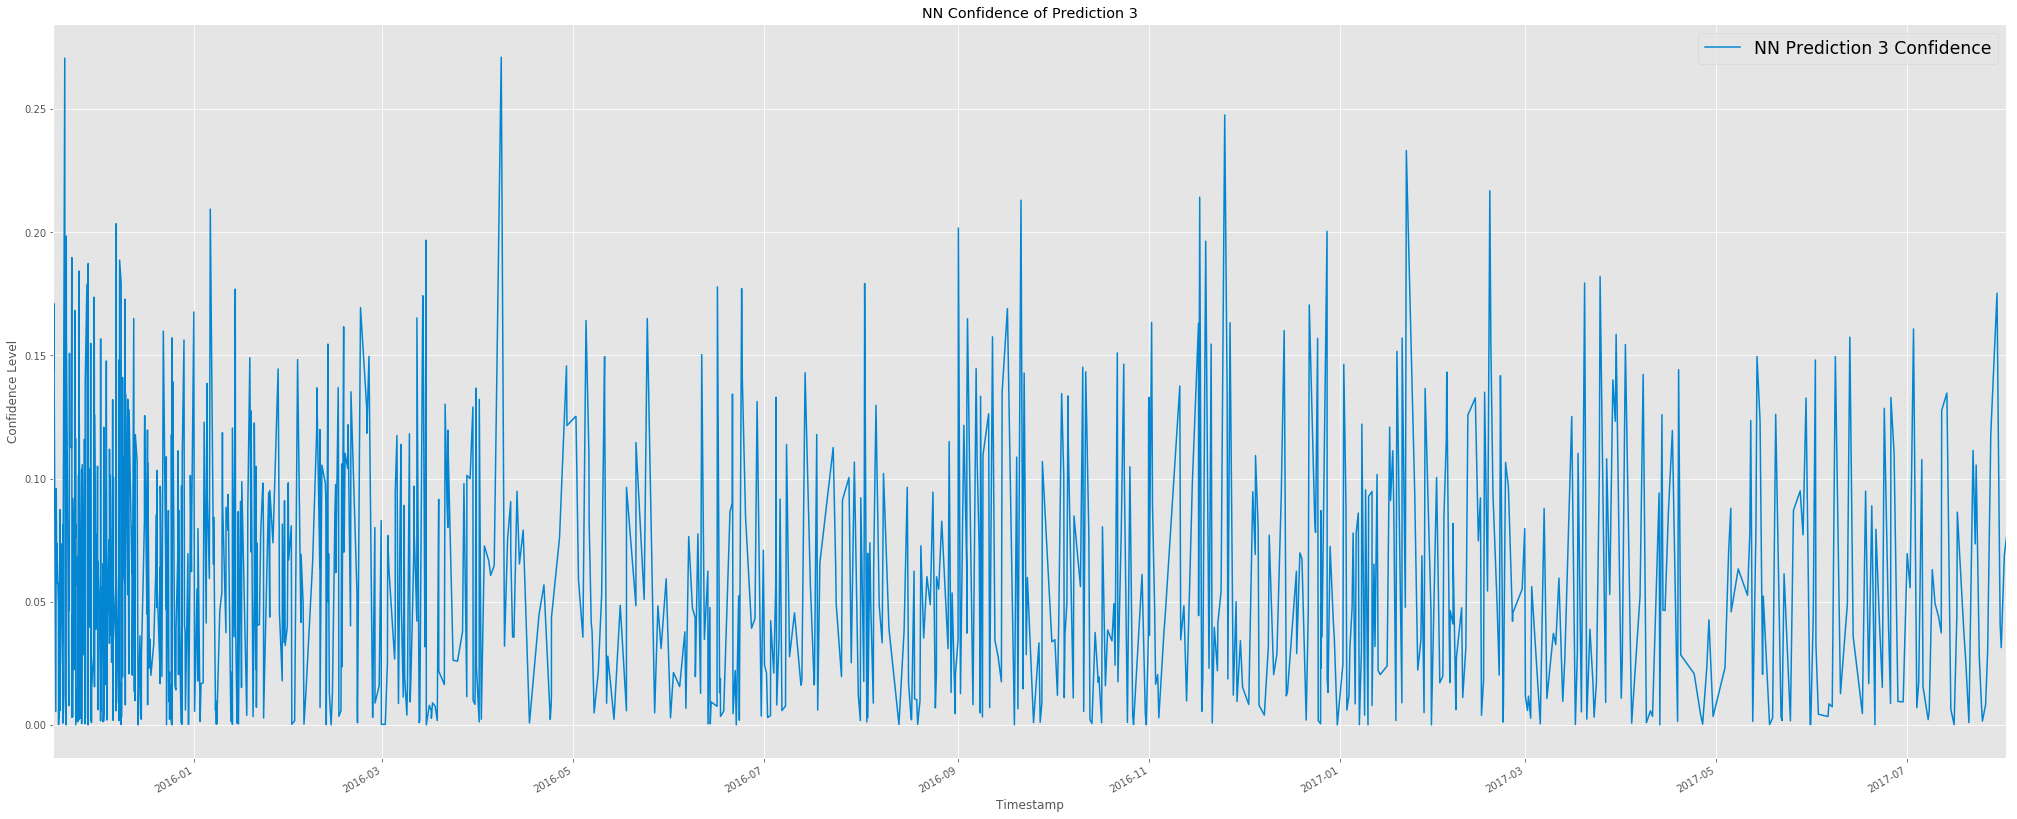

In [81]:
temp_master.p3_conf.plot(label = 'NN Prediction 3 Confidence', color = 'xkcd:cerulean')

plt.style.use('ggplot')
plt.legend(loc= 1, fontsize = 'xx-large')
plt.xlabel('Timestamp')
plt.ylabel('Confidence Level')
plt.title('NN Confidence of Prediction 3')

fig = plt.gcf()
fig.set_size_inches(35, 15)
plt.show()

In [82]:
temp_master.p3_conf.describe()

count    1.080000e+03
mean     6.025594e-02
std      5.158828e-02
min      1.740170e-10
25%      1.524335e-02
50%      4.851795e-02
75%      9.446718e-02
max      2.710420e-01
Name: p3_conf, dtype: float64

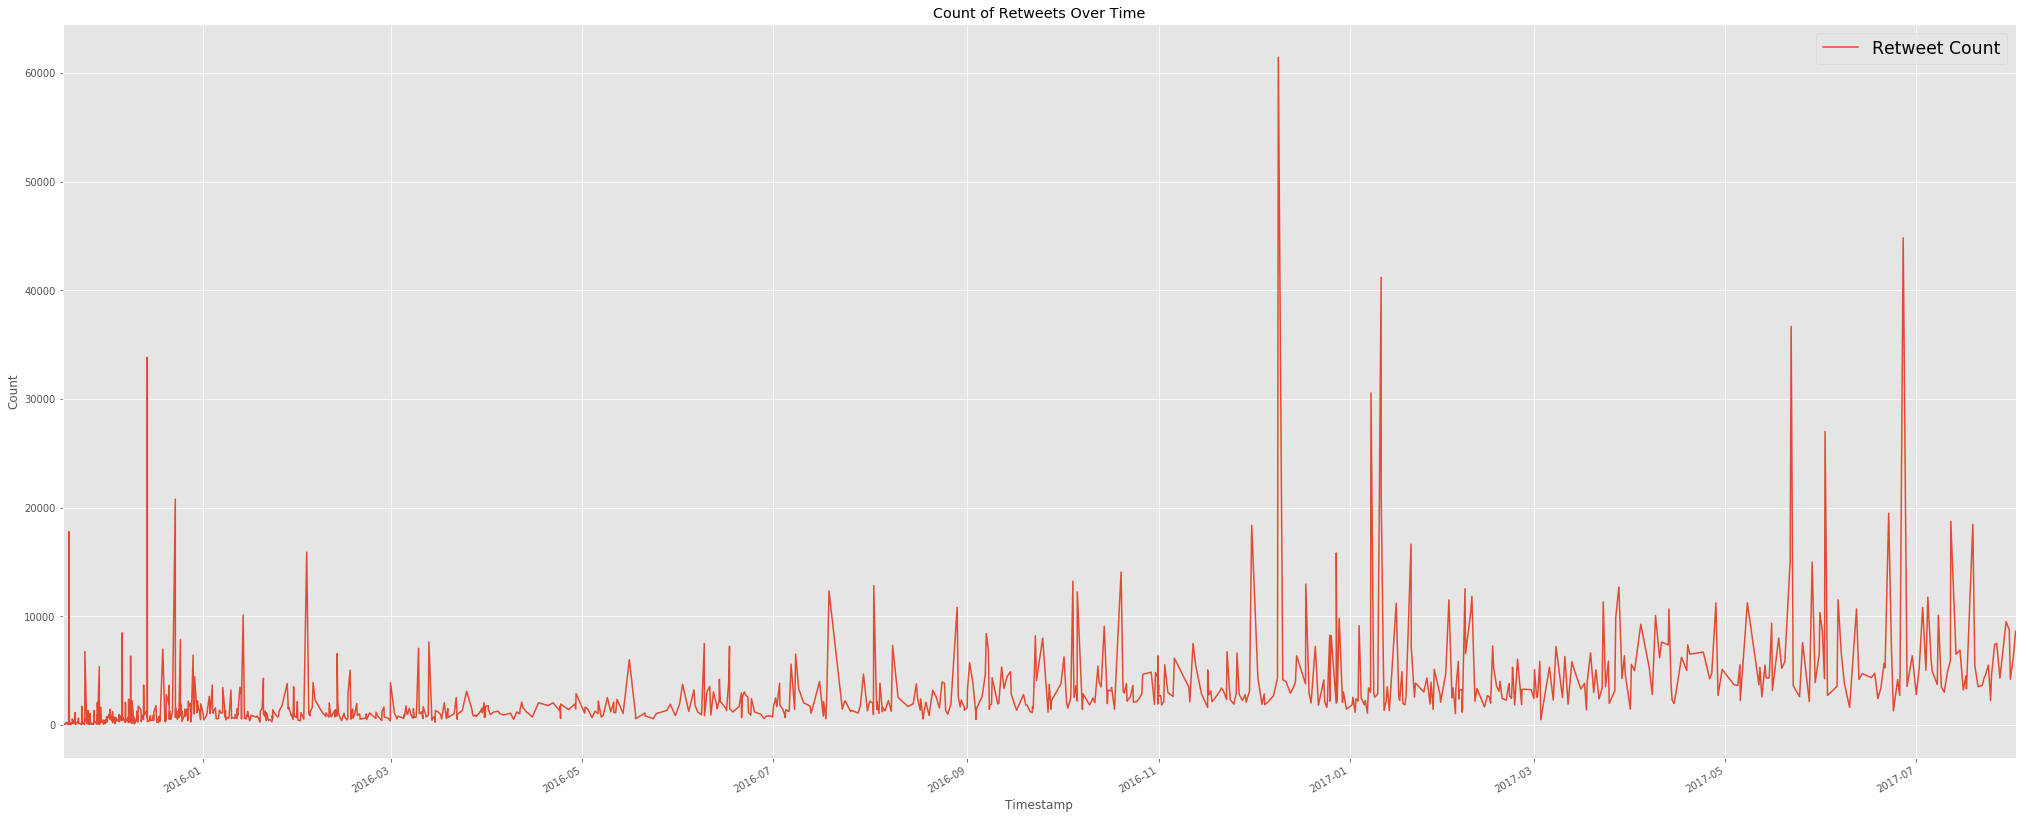

In [83]:
temp_master.retweet_count.plot(label='Retweet Count')


plt.style.use('ggplot')
plt.legend(loc= 1, fontsize = 'xx-large')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Count of Retweets Over Time')

fig = plt.gcf()
fig.set_size_inches(35, 15)
plt.show()

In [84]:
temp_master.retweet_count.describe()

count     1080.000000
mean      2741.740741
std       4228.366467
min         22.000000
25%        696.000000
50%       1495.000000
75%       3246.000000
max      61438.000000
Name: retweet_count, dtype: float64

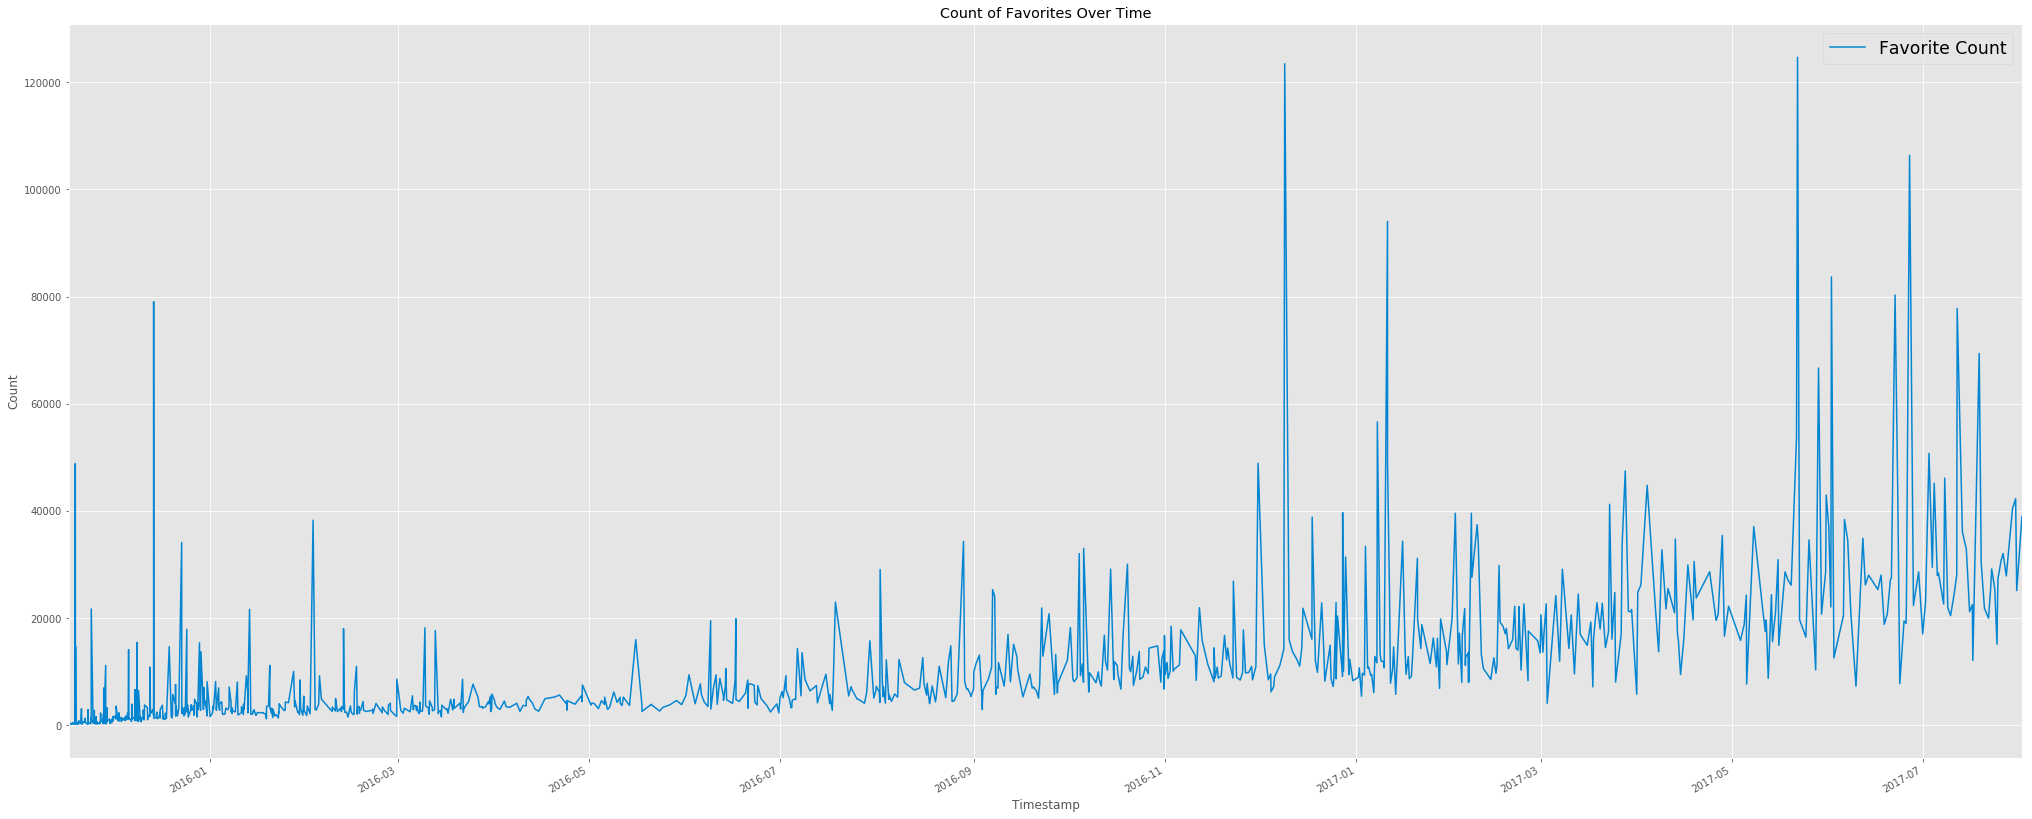

In [85]:
temp_master.favorite_count.plot(label='Favorite Count', color = 'xkcd:cerulean')

plt.style.use('ggplot')
plt.legend(loc= 1, fontsize = 'xx-large')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Count of Favorites Over Time')

fig = plt.gcf()
fig.set_size_inches(35, 15)
plt.show()

In [86]:
temp_master.favorite_count.describe()

count      1080.000000
mean       9504.458333
std       12503.707095
min         104.000000
25%        2326.750000
50%        4807.500000
75%       12132.250000
max      124656.000000
Name: favorite_count, dtype: float64

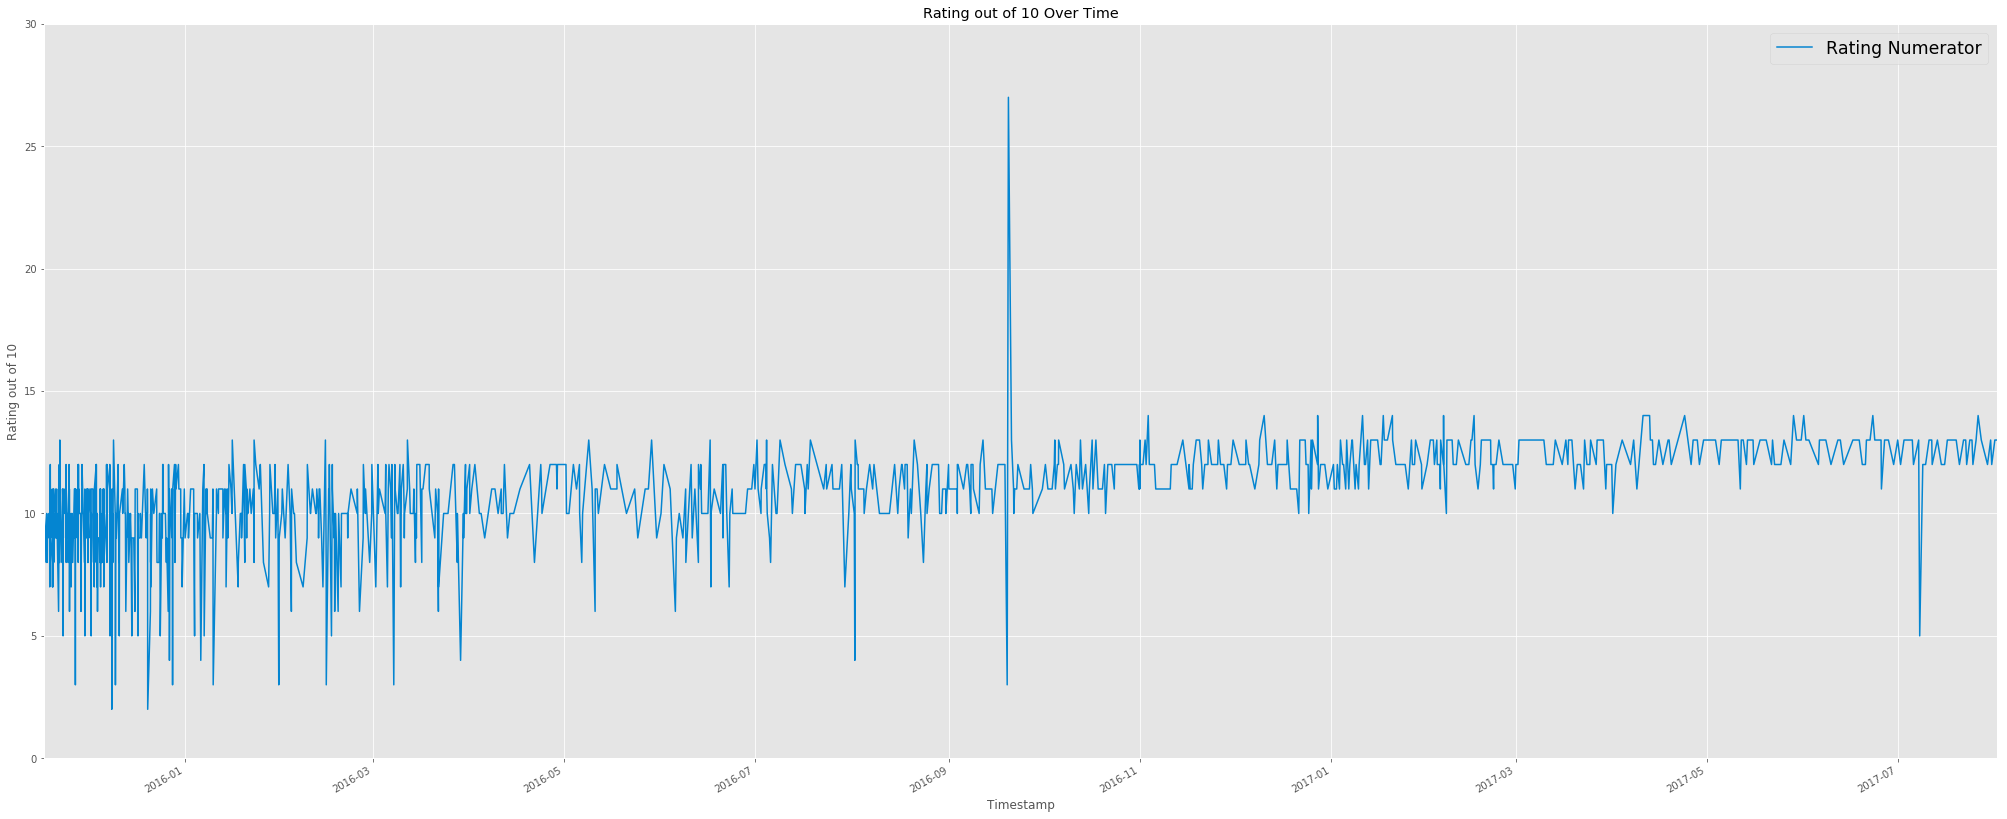

In [87]:
temp_master.rating_numerator.plot(label='Rating Numerator', color = 'xkcd:cerulean')

plt.style.use('ggplot')
plt.legend(loc= 1, fontsize = 'xx-large')
plt.xlabel('Timestamp')
plt.ylabel('Rating out of 10')
plt.title('Rating out of 10 Over Time')

axes = plt.gca()
fig = plt.gcf()

axes.set_ylim([0, 30])
fig.set_size_inches(35, 15)
plt.show()

In [88]:
temp_master.rating_numerator.describe()

count    1080.000000
mean       10.715741
std         2.012411
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        27.000000
Name: rating_numerator, dtype: float64

# References ----------------------------------------------------------------------------------------------

http://docs.python-requests.org/en/master/

https://stackoverflow.com/questions/9282967/how-to-open-a-file-using-the-open-with-statement

https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf

https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/

http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

https://www.programiz.com/python-programming/methods/built-in/open

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

https://stackoverflow.com/questions/2665866/what-is-the-wb-mean-in-this-code-using-python/2665873

https://stackoverflow.com/questions/32966263/json-dump-not-working-while-streaming-tweets

https://stackoverflow.com/questions/48733835/tweepy-transform-list-of-tweetsjson-into-a-dataframe

https://github.com/bossiernesto/Twitter_Analytics/blob/master/analyze.py#L48

https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

https://stackoverflow.com/questions/27275236/pandas-best-way-to-select-all-columns-starting-with-x

https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.align.html

https://pandas.pydata.org/pandas-docs/stable/merging.html

https://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition

https://docs.python.org/3/library/re.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html

https://stackoverflow.com/questions/47281123/drop-rows-of-selected-rows-with-null-values

https://stackoverflow.com/questions/35889505/check-that-a-string-contains-only-ascii-characters/35890514

https://docs.python.org/3/library/functions.html#ord

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.get_dtype_counts.html

https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition

https://stackoverflow.com/questions/45020225/combine-numbers-from-two-columns-to-create-one-array

https://matplotlib.org/users/pyplot_tutorial.html

https://pandas.pydata.org/pandas-docs/stable/visualization.html

https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

https://xkcd.com/color/rgb/

https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib